In [1]:
## magics

%load_ext version_information 
%version_information numpy,xarray,netCDF4


Software versions
Python 2.7.15 64bit [GCC 7.3.0]
IPython 4.2.0
OS Linux 3.16.0 6 amd64 x86_64 with debian 8.11
numpy 1.14.2
xarray 0.10.4
netCDF4 1.4.0
Fri Mar 15 15:06:23 2019 CET

In [2]:
## path for mdules

import sys
sys.path.insert(0,"/home/albert/lib/python")


In [3]:
## imports

import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd 
import datetime
import glob as glob
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import time
from dask.diagnostics import ProgressBar
import numpy.ma as ma

%matplotlib inline

In [112]:
## datasets

#NACHOS12
bathy_gs="/media/extra/DATA/GS24.L75/1_NACHOS12.L75_domain_cfg_newbathy_correct-bathy.nc"
output_gs='/media/extra/DATA/GS24.L75/output.init.nc'
bdyN_gs='/media/extra/DATA/GS24.L75/vosaline_Nbdy_NACHOS12-MAA4001_y2010m01_nonan.nc'
bdyS_gs='/media/extra/DATA/GS24.L75/vosaline_Sbdy_NACHOS12-MAA4001_y2010m01.nc'
bdyE_gs='/media/extra/DATA/GS24.L75/vosaline_Ebdy_NACHOS12-MAA4001_y2010m01.nc'



In [113]:
dsbaGS=xr.open_dataset(bathy_gs)
dsouGS=xr.open_dataset(output_gs)

dsbdyN=xr.open_dataset(bdyN_gs)
dsbdyS=xr.open_dataset(bdyS_gs)
dsbdyE=xr.open_dataset(bdyE_gs)

lat=dsbaGS.gphit
lon=dsbaGS.glamt

dep=dsouGS.deptht

batGS=dsbaGS.bathy_metry

vosaGS=dsouGS.vosaline
vosaGSbdyN=dsbdyN.vosaline
vosaGSbdyS=dsbdyS.vosaline
vosaGSbdyE=dsbdyE.vosaline





In [68]:
vosaGS.shape

(1, 75, 676, 1138)

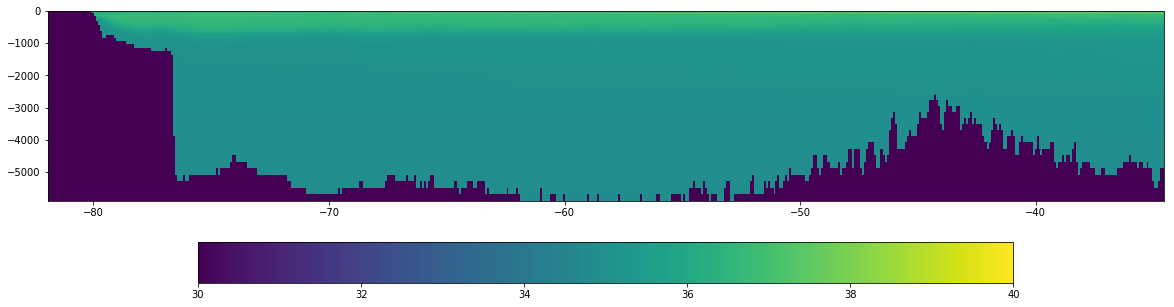

In [15]:
fig = plt.figure(figsize=(20,5))
plt.pcolor(lon[0,1,1:-1],-1*dep,ma.masked_invalid(vosaGS[0,:,1,1:-1]), vmin=30, vmax=40)
plt.colorbar(orientation='horizontal',shrink=0.75)

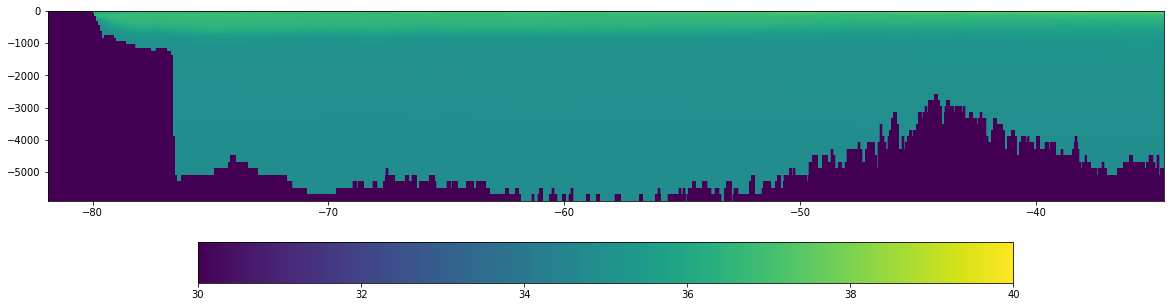

In [21]:
fig = plt.figure(figsize=(20,5))
plt.pcolor(lon[0,1,1:-1],-1*dep,ma.masked_invalid(vosaGSbdyS[0,:,0,:]), vmin=30, vmax=40)
plt.colorbar(orientation='horizontal',shrink=0.75)

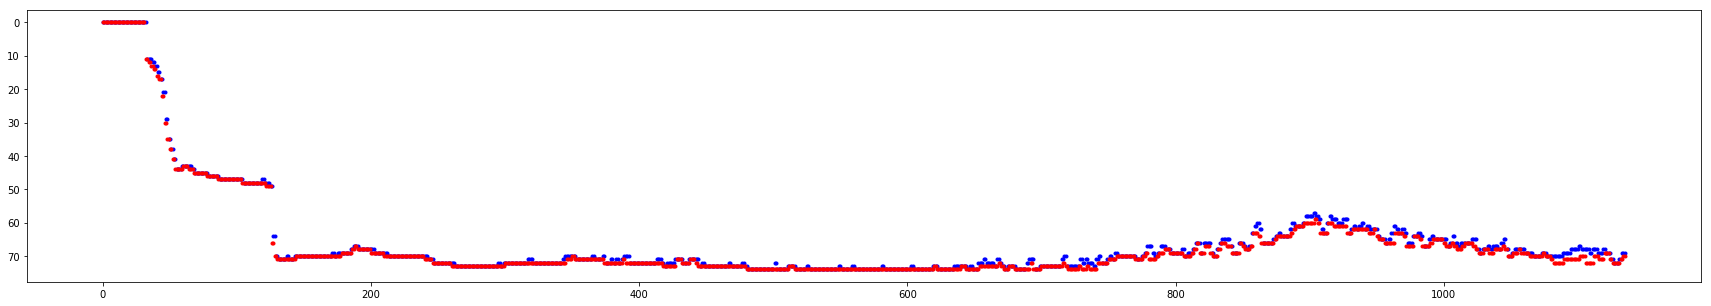

In [65]:
pmaxSout=np.zeros([1136,1])
for j in np.arange(1136):
    prof=vosaGS[0,:,1,j+1]
    k=np.min(np.where(prof==0))
    pmaxSout[j]=k
    
pmaxSbdy=np.zeros([1136,1])
for j in np.arange(1136):
    prof=vosaGSbdyS[0,:,0,j]
    k=np.min(np.where(prof==0))
    pmaxSbdy[j]=k
    
fig = plt.figure(figsize=(30,5))
plt.plot(pmaxSout, 'b.')
plt.plot(pmaxSbdy, 'r.')
plt.gca().invert_yaxis()

plt.savefig('compare_deptht_out-Sbdy_GS24.png')

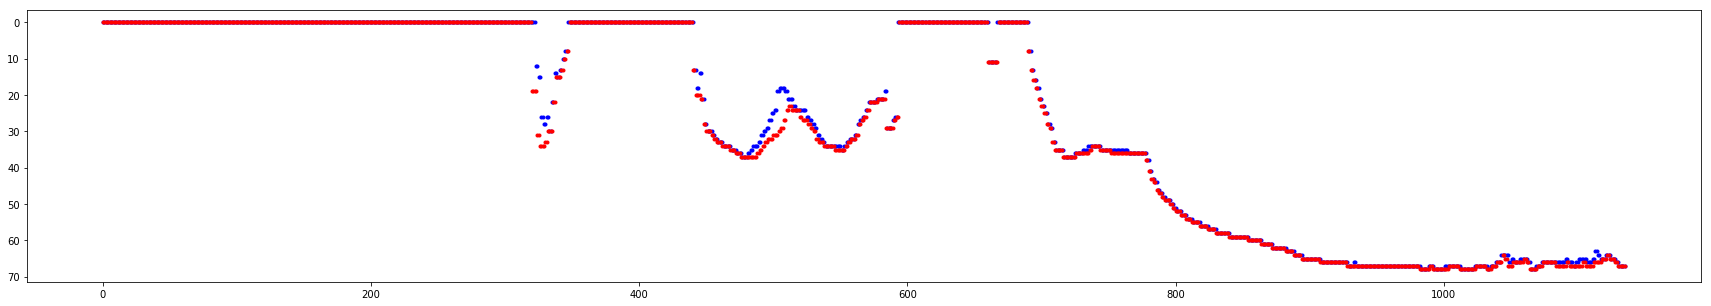

In [114]:
pmaxNout=np.zeros([1136,1])
for j in np.arange(1136):
    prof=vosaGS[0,:,674,j+1]
    k=np.min(np.where(prof==0))
    pmaxNout[j]=k
    
pmaxNbdy=np.zeros([1136,1])
for j in np.arange(1136):
    prof=vosaGSbdyN[0,:,0,j]
    k=np.min(np.where(prof==0))
    pmaxNbdy[j]=k
    
fig = plt.figure(figsize=(30,5))
plt.plot(pmaxNout, 'b.')
plt.plot(pmaxNbdy, 'r.')
plt.gca().invert_yaxis()

plt.savefig('compare_deptht_out-Nbdy_GS24.png')

In [118]:
vosaGSbdyE.shape

(31, 75, 1, 674)

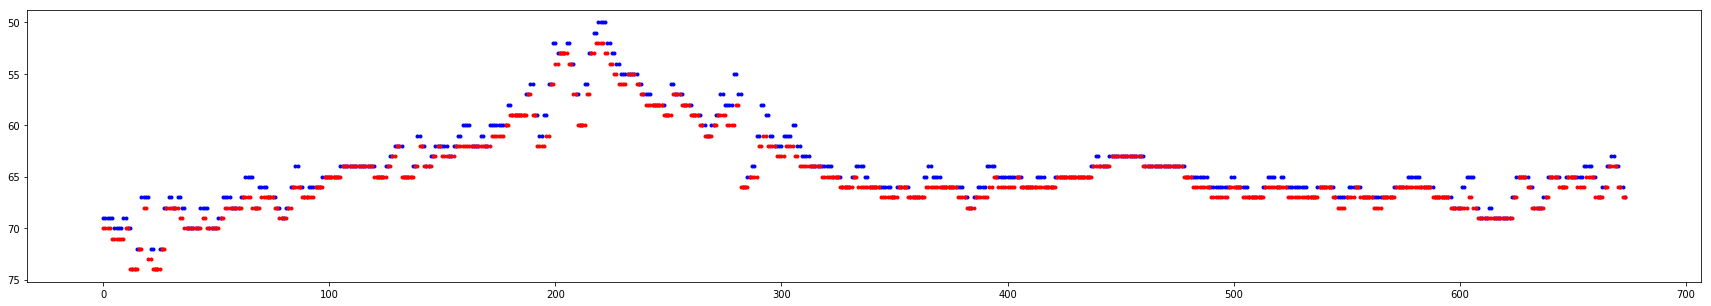

In [119]:
pmaxEout=np.zeros([674,1])
for j in np.arange(674):
    prof=vosaGS[0,:,j+1,1136]
    k=np.min(np.where(prof==0))
    pmaxEout[j]=k
    
pmaxEbdy=np.zeros([674,1])
for j in np.arange(674):
    prof=vosaGSbdyE[0,:,0,j]
    k=np.min(np.where(prof==0))
    pmaxEbdy[j]=k
    
fig = plt.figure(figsize=(30,5))
plt.plot(pmaxEout, 'b.')
plt.plot(pmaxEbdy, 'r.')
plt.gca().invert_yaxis()

plt.savefig('compare_deptht_out-Ebdy_GS24.png')